<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/MergingDataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

### Preparing Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
bronze = pd.read_csv('Bronze.csv')
silver = pd.read_csv('Silver.csv')
gold = pd.read_csv('Gold.csv')
gold.head()

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [0]:
filenames = ['Bronze.csv','Silver.csv','Gold.csv']
dataframes = []
for filename in filenames:
  dataframes.append(pd.read_csv(filename))

In [0]:
dataframes[0].head()

,NOC,Country,Total
0,USA,United States,1052.0
1,URS,Soviet Union,584.0
2,GBR,United Kingdom,505.0
3,FRA,France,475.0
4,GER,Germany,454.0


In [0]:
medals = dataframes[2].copy()
medals.head()

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [0]:
new_labels = ['NOC','Country','Gold']
medals.columns = new_labels
medals.head()

,NOC,Country,Gold
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [0]:
medals['Silver'] = gold['Total']
medals['Bronze'] = bronze['Total']
medals.head()

,NOC,Country,Gold,Silver,Bronze
0,USA,United States,2088.0,2088.0,1052.0
1,URS,Soviet Union,838.0,838.0,584.0
2,GBR,United Kingdom,498.0,498.0,505.0
3,FRA,France,378.0,378.0,475.0
4,GER,Germany,407.0,407.0,454.0


In [0]:
service = pd.read_csv('feb-sales-Service.csv',index_col='Date')
hardware = pd.read_csv('feb-sales-Hardware.csv',index_col='Date')
software = pd.read_csv('feb-sales-Software.csv',index_col='Date')
service.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-25 00:29:00,Initech,Service,10
2015-02-09 08:57:30,Streeplex,Service,19
2015-02-26 08:58:51,Streeplex,Service,1
2015-02-05 22:05:03,Hooli,Service,10


In [0]:
# Use sort_index() to sort indexes
service.sort_index(inplace=True)
service.head()

,Company,Product,Units
Date,,,
2015-02-05 22:05:03,Hooli,Service,10
2015-02-09 08:57:30,Streeplex,Service,19
2015-02-19 16:02:58,Mediacore,Service,10
2015-02-25 00:29:00,Initech,Service,10
2015-02-26 08:57:45,Streeplex,Service,4


### Use pd.reindex() to impose desired order from categorical list input , can add new indices and row will contain NaN, it seems like it's only worth it if you have a small data set

In [0]:
software = pd.read_csv('feb-sales-Software.csv',index_col='Company')
software.sort_index(inplace=True, ascending=False)
software.head()

,Date,Product,Units
Company,,,
Streeplex,2015-02-04 15:36:29,Software,13
Mediacore,2015-02-09 13:09:55,Software,7
Mediacore,2015-02-21 05:01:26,Software,3
Initech,2015-02-03 14:14:18,Software,13
Initech,2015-02-11 20:03:08,Software,7


In [0]:
eighteen = pd.read_csv('names1881.csv')
nineteen = pd.read_csv('names1981.csv')
eighteen.head()

,Mary,F,6919
0,Anna,F,2698
1,Emma,F,2034
2,Elizabeth,F,1852
3,Margaret,F,1658
4,Minnie,F,1653


In [0]:
eighteen.shape

(1934, 3)

In [0]:
#nineteen.head()
nineteen.shape

(19454, 3)

In [0]:
nineteen.reindex(eighteen.index)

,Jennifer,F,57032
0,Jessica,F,42519
1,Amanda,F,34370
2,Sarah,F,28162
3,Melissa,F,28003
4,Amy,F,20337
...,...,...,...
1929,Seema,F,56
1930,Tiffeny,F,56
1931,Yashica,F,56
1932,Alexandrea,F,55


In [0]:
nineteen.isna().any()

Jennifer    False
F           False
57032       False
dtype: bool

In [0]:
nineteen.dropna()

,Jennifer,F,57032
0,Jessica,F,42519
1,Amanda,F,34370
2,Sarah,F,28162
3,Melissa,F,28003
4,Amy,F,20337
...,...,...,...
19449,Zeferino,M,5
19450,Zerrick,M,5
19451,Zimbabwe,M,5
19452,Zoltan,M,5


In [0]:
nineteen.isna().any()

Jennifer    False
F           False
57032       False
dtype: bool

### Arithmetic with Dataframes and Series

In [0]:
weather = pd.read_csv('pittsburgh2013.csv',index_col='Date',parse_dates=True)
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,30.01,29.94,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,30.18,30.08,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,30.21,30.16,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,30.21,30.12,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,30.30,30.17,10,10,10,16,10,23.0,0.21,5,NaN,221


In [0]:
weather.loc['2013-07-01':'2013-07-07','PrecipitationIn']

Date
2013-07-01    0.18
2013-07-02    0.14
2013-07-03    0.00
2013-07-04    0.25
2013-07-05    0.02
2013-07-06    0.06
2013-07-07    0.10
Name: PrecipitationIn, dtype: float64

In [0]:
weather.loc['2013-07-01':'2013-07-07','PrecipitationIn']*2.54

Date
2013-07-01    0.4572
2013-07-02    0.3556
2013-07-03    0.0000
2013-07-04    0.6350
2013-07-05    0.0508
2013-07-06    0.1524
2013-07-07    0.2540
Name: PrecipitationIn, dtype: float64

In [0]:
week1_range= weather.loc['2013-07-01':'2013-07-07',['Min TemperatureF','Max TemperatureF']]
week1_range

,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,66,79
2013-07-02,66,84
2013-07-03,71,86
2013-07-04,70,86
2013-07-05,69,86
2013-07-06,70,89
2013-07-07,70,77


In [0]:
week1_mean = weather.loc['2013-07-01':'2013-07-07', 'Mean TemperatureF']
week1_mean

Date
2013-07-01    72
2013-07-02    74
2013-07-03    78
2013-07-04    77
2013-07-05    76
2013-07-06    78
2013-07-07    72
Name: Mean TemperatureF, dtype: int64

In [0]:
week1_range.divide(week1_mean,axis='rows')

,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,0.916667,1.097222
2013-07-02,0.891892,1.135135
2013-07-03,0.910256,1.102564
2013-07-04,0.909091,1.116883
2013-07-05,0.907895,1.131579
2013-07-06,0.897436,1.141026
2013-07-07,0.972222,1.069444


In [0]:
week1_mean.pct_change()*100

Date
2013-07-01         NaN
2013-07-02    2.777778
2013-07-03    5.405405
2013-07-04   -1.282051
2013-07-05   -1.298701
2013-07-06    2.631579
2013-07-07   -7.692308
Name: Mean TemperatureF, dtype: float64

In [0]:
bronze = pd.read_csv('Bronze.csv',index_col=0)
silver = pd.read_csv('Silver.csv',index_col=0)
gold = pd.read_csv('Gold.csv',index_col=0)

In [0]:
bronze + silver

,Country,Total
NOC,,
USA,United StatesUnited States,2247.0
URS,Soviet UnionSoviet Union,1211.0
GBR,United KingdomUnited Kingdom,1096.0
FRA,FranceFrance,936.0
GER,GermanyGermany,804.0
...,...,...
SEN,SenegalSenegal,NaN
SUD,SudanSudan,NaN
TGA,TongaTonga,NaN


In [0]:
bronze.add(silver,fill_value=0)

,Country,Total
NOC,,
USA,United StatesUnited States,2247.0
URS,Soviet UnionSoviet Union,1211.0
GBR,United KingdomUnited Kingdom,1096.0
FRA,FranceFrance,936.0
GER,GermanyGermany,804.0
...,...,...
SEN,SenegalSenegal,1.0
SUD,SudanSudan,1.0
TGA,TongaTonga,1.0


ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
bronze + silver + gold

,Country,Total
NOC,,
USA,United StatesUnited StatesUnited States,4335.0
URS,Soviet UnionSoviet UnionSoviet Union,2049.0
GBR,United KingdomUnited KingdomUnited Kingdom,1594.0
FRA,FranceFranceFrance,1314.0
GER,GermanyGermanyGermany,1211.0
...,...,...
SEN,SenegalSenegalSenegal,NaN
SUD,SudanSudanSudan,NaN
TGA,TongaTongaTonga,NaN


In [0]:
bronze.add(silver,fill_value=0).add(gold,fill_value=0)

,Country,Total
NOC,,
USA,United StatesUnited StatesUnited States,4335.0
URS,Soviet UnionSoviet UnionSoviet Union,2049.0
GBR,United KingdomUnited KingdomUnited Kingdom,1594.0
FRA,FranceFranceFrance,1314.0
GER,GermanyGermanyGermany,1211.0
...,...,...
SEN,SenegalSenegalSenegal,1.0
SUD,SudanSudanSudan,1.0
TGA,TongaTongaTonga,1.0


In [0]:
# If indexes don't match, table will return null values

In [0]:
farenheight= weather.loc[:,['Min TemperatureF','Mean TemperatureF','Max TemperatureF']]
farenheight

,Min TemperatureF,Mean TemperatureF,Max TemperatureF
Date,,,
2013-01-01,21,28,32
2013-01-02,17,21,25
2013-01-03,16,24,32
2013-01-04,27,28,30
2013-01-05,25,30,34
...,...,...,...
2013-12-27,27,34,41
2013-12-28,34,43,52
2013-12-29,39,42,44


In [0]:
celsius = (farenheight - 32) * 5/9
celsius

,Min TemperatureF,Mean TemperatureF,Max TemperatureF
Date,,,
2013-01-01,-6.111111,-2.222222,0.000000
2013-01-02,-8.333333,-6.111111,-3.888889
2013-01-03,-8.888889,-4.444444,0.000000
2013-01-04,-2.777778,-2.222222,-1.111111
2013-01-05,-3.888889,-1.111111,1.111111
...,...,...,...
2013-12-27,-2.777778,1.111111,5.000000
2013-12-28,1.111111,6.111111,11.111111
2013-12-29,3.888889,5.555556,6.666667


In [0]:
#Can't get str.replace() to work in ipynb's
celsiuis = celsius.columns.str.replace('F','C')
celsius.head(1)

,Min TemperatureF,Mean TemperatureF,Max TemperatureF
Date,,,
2013-01-01,-6.111111,-2.222222,0.0


In [0]:
cols = ['Min TemperatureC', 'Mean TemperatureC', 'Max TemperatureC']
celsius.columns = cols
celsius.head(0)

,Min TemperatureC,Mean TemperatureC,Max TemperatureC
Date,,,


### (Resampling time series data)

In [0]:
gdp = pd.read_csv('gdp_usa.csv',index_col='DATE',parse_dates=True)
gdp.head()

,VALUE
DATE,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2


In [0]:
gdp.shape

(278, 1)

In [0]:
aft2008 = gdp[gdp.index>'2008']
aft2008.head()

,VALUE
DATE,
2008-04-01,14813.0
2008-07-01,14843.0
2008-10-01,14549.9
2009-01-01,14383.9
2009-04-01,14340.4


In [0]:
# Resampling
yearly= aft2008.resample('A').last()
yearly

,VALUE
DATE,
2008-12-31,14549.9
2009-12-31,14566.5
2010-12-31,15230.2
2011-12-31,15785.3
2012-12-31,16297.3
2013-12-31,16999.9
2014-12-31,17692.2
2015-12-31,18222.8
2016-12-31,18436.5


In [0]:
yearly.pct_change()*100

,VALUE
DATE,
2008-12-31,NaN
2009-12-31,0.114090
2010-12-31,4.556345
2011-12-31,3.644732
2012-12-31,3.243524
2013-12-31,4.311144
2014-12-31,4.072377
2015-12-31,2.999062
2016-12-31,1.172707


In [5]:
exchange = pd.read_csv('exchange.csv', parse_dates=True,index_col='Date')
sp = pd.read_csv('sp500.csv', parse_dates=True,index_col='Date')
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


In [0]:
exchange.head()

,GBP/USD
Date,
2015-01-02,0.65101
2015-01-05,0.65644
2015-01-06,0.65896
2015-01-07,0.66344
2015-01-08,0.66151


In [0]:
dollars = sp[['Open','Close']]
dollars.head()

,Open,Close
Date,,
2015-01-02,2058.899902,2058.199951
2015-01-05,2054.439941,2020.579956
2015-01-06,2022.150024,2002.609985
2015-01-07,2005.550049,2025.900024
2015-01-08,2030.609985,2062.139893


In [0]:
pounds = dollars.multiply(exchange['GBP/USD'],axis='rows')
pounds.head()

,Open,Close
Date,,
2015-01-02,1340.364425,1339.908750
2015-01-05,1348.616555,1326.389506
2015-01-06,1332.515980,1319.639876
2015-01-07,1330.562125,1344.063112
2015-01-08,1343.268811,1364.126161


# Concatenating Data

In [0]:
# append() only vertically and concatenate() vertically and horizontally
# df1.append(df2).reset_index(drop=True) --> this is to reset index because stacking df's can lead to index problem/repeat indices
# var = pd.concat([df1,df2],ignore_index=True) --> same effect to leave a problematic index out of the way
# var = pd.concat([df1,df2])--> same thing as chaining append()
# var = pd.concat([df1,df2],axis = 'index'/0 or 'columns'/1)--> how to concatenate
# var= pd.read_csv('csv.csv', index_col=0, parse_dates=True) parse_dates=True or parse_dates=['column name'] tells pandas to treat column like a date


In [13]:
exchange = pd.read_csv('exchange.csv', parse_dates=True,index_col='Date')
sp = pd.read_csv('sp500.csv', parse_dates=True,index_col='Date')
sp.head(), sp.shape


(                   Open         High  ...      Volume    Adj Close
 Date                                  ...                         
 2015-01-02  2058.899902  2072.360107  ...  2708700000  2058.199951
 2015-01-05  2054.439941  2054.439941  ...  3799120000  2020.579956
 2015-01-06  2022.150024  2030.250000  ...  4460110000  2002.609985
 2015-01-07  2005.550049  2029.609985  ...  3805480000  2025.900024
 2015-01-08  2030.609985  2064.080078  ...  3934010000  2062.139893
 
 [5 rows x 6 columns], (252, 6))

In [11]:
exchange.head(), exchange.shape

(            GBP/USD
 Date               
 2015-01-02  0.65101
 2015-01-05  0.65644
 2015-01-06  0.65896
 2015-01-07  0.66344
 2015-01-08  0.66151, (250, 1))

In [17]:
type(exchange),type(sp)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [19]:
spex = pd.concat([exchange,sp], axis='columns')
spex

,GBP/USD,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2015-01-02,0.65101,2058.899902,2072.360107,2046.040039,2058.199951,2.708700e+09,2058.199951
2015-01-05,0.65644,2054.439941,2054.439941,2017.339966,2020.579956,3.799120e+09,2020.579956
2015-01-06,0.65896,2022.150024,2030.250000,1992.439941,2002.609985,4.460110e+09,2002.609985
2015-01-07,0.66344,2005.550049,2029.609985,2005.550049,2025.900024,3.805480e+09,2025.900024
2015-01-08,0.66151,2030.609985,2064.080078,2030.609985,2062.139893,3.934010e+09,2062.139893
...,...,...,...,...,...,...,...
2015-12-24,0.66926,2063.520020,2067.360107,2058.729980,2060.989990,1.411860e+09,2060.989990
2015-12-28,NaN,2057.770020,2057.770020,2044.199951,2056.500000,2.492510e+09,2056.500000
2015-12-29,0.67597,2060.540039,2081.560059,2060.540039,2078.360107,2.542000e+09,2078.360107


In [24]:
spex = pd.concat([exchange,sp], ignore_index=True, axis='columns')
spex

,0,1,2,3,4,5,6
Date,,,,,,,
2015-01-02,0.65101,2058.899902,2072.360107,2046.040039,2058.199951,2.708700e+09,2058.199951
2015-01-05,0.65644,2054.439941,2054.439941,2017.339966,2020.579956,3.799120e+09,2020.579956
2015-01-06,0.65896,2022.150024,2030.250000,1992.439941,2002.609985,4.460110e+09,2002.609985
2015-01-07,0.66344,2005.550049,2029.609985,2005.550049,2025.900024,3.805480e+09,2025.900024
2015-01-08,0.66151,2030.609985,2064.080078,2030.609985,2062.139893,3.934010e+09,2062.139893
...,...,...,...,...,...,...,...
2015-12-24,0.66926,2063.520020,2067.360107,2058.729980,2060.989990,1.411860e+09,2060.989990
2015-12-28,NaN,2057.770020,2057.770020,2044.199951,2056.500000,2.492510e+09,2056.500000
2015-12-29,0.67597,2060.540039,2081.560059,2060.540039,2078.360107,2.542000e+09,2078.360107


In [21]:
spex.isna().sum()

GBP/USD      6
Open         4
High         4
Low          4
Close        4
Volume       4
Adj Close    4
dtype: int64

In [22]:
append = sp.append(exchange)
append.head()

,Open,High,Low,Close,Volume,Adj Close,GBP/USD
Date,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2.708700e+09,2058.199951,NaN
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3.799120e+09,2020.579956,NaN
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4.460110e+09,2002.609985,NaN
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3.805480e+09,2025.900024,NaN
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3.934010e+09,2062.139893,NaN


In [0]:
filenames = ['Bronze.csv','Silver.csv','Gold.csv']
dataframes = []
for filename in filenames:
  dataframes.append(pd.read_csv(filename))

In [29]:
medals = pd.concat([dataframes[0],dataframes[1],dataframes[2]], axis='columns')
medals.head(20)

,NOC,Country,Total,NOC,Country,Total,NOC,Country,Total
0,USA,United States,1052.0,USA,United States,1195.0,USA,United States,2088.0
1,URS,Soviet Union,584.0,URS,Soviet Union,627.0,URS,Soviet Union,838.0
2,GBR,United Kingdom,505.0,GBR,United Kingdom,591.0,GBR,United Kingdom,498.0
3,FRA,France,475.0,FRA,France,461.0,FRA,France,378.0
4,GER,Germany,454.0,GER,Germany,350.0,GER,Germany,407.0
5,AUS,Australia,413.0,AUS,Australia,369.0,AUS,Australia,293.0
6,ITA,Italy,374.0,ITA,Italy,394.0,ITA,Italy,460.0
7,HUN,Hungary,345.0,HUN,Hungary,308.0,HUN,Hungary,400.0
8,SWE,Sweden,325.0,SWE,Sweden,349.0,SWE,Sweden,347.0
9,NED,Netherlands,320.0,NED,Netherlands,250.0,NED,Netherlands,212.0


In [32]:
bronze = pd.read_csv('Bronze.csv',index_col=0)
silver = pd.read_csv('Silver.csv',index_col=0)
gold = pd.read_csv('Gold.csv',index_col=0)
medals2 = pd.concat([gold, silver, bronze], keys=['Gold','Silver','Bronze'],axis=0) # Use keys to label data according to category, order has to match order of input dataframes
medals2

Country   Total
       NOC                              
Gold   USA         United States  2088.0
       URS          Soviet Union   838.0
       GBR        United Kingdom   498.0
       FRA                France   378.0
       GER               Germany   407.0
...                          ...     ...
Bronze SEN               Senegal     NaN
       SUD                 Sudan     NaN
       TGA                 Tonga     NaN
       BDI               Burundi     NaN
       UAE  United Arab Emirates     NaN

[414 rows x 2 columns]

In [33]:
medals3 = pd.concat([gold, silver, bronze], keys=['Gold','Silver','Bronze'],axis=1)
medals3 

Gold          ...                Bronze        
                  Country   Total  ...               Country   Total
NOC                                ...                              
USA         United States  2088.0  ...         United States  1052.0
URS          Soviet Union   838.0  ...          Soviet Union   584.0
GBR        United Kingdom   498.0  ...        United Kingdom   505.0
FRA                France   378.0  ...                France   475.0
GER               Germany   407.0  ...               Germany   454.0
..                    ...     ...  ...                   ...     ...
SEN               Senegal     NaN  ...               Senegal     NaN
SUD                 Sudan     NaN  ...                 Sudan     NaN
TGA                 Tonga     NaN  ...                 Tonga     NaN
BDI               Burundi     1.0  ...               Burundi     NaN
UAE  United Arab Emirates     1.0  ...  United Arab Emirates     NaN

[138 rows x 6 columns]

In [35]:
dict_meds = {'Gold': gold, 'Silver': silver, 'Bronze': bronze}
medals4 = pd.concat(dict_meds, axis=1)
medals4

Gold          ...                Bronze        
                  Country   Total  ...               Country   Total
NOC                                ...                              
USA         United States  2088.0  ...         United States  1052.0
URS          Soviet Union   838.0  ...          Soviet Union   584.0
GBR        United Kingdom   498.0  ...        United Kingdom   505.0
FRA                France   378.0  ...                France   475.0
GER               Germany   407.0  ...               Germany   454.0
..                    ...     ...  ...                   ...     ...
SEN               Senegal     NaN  ...               Senegal     NaN
SUD                 Sudan     NaN  ...                 Sudan     NaN
TGA                 Tonga     NaN  ...                 Tonga     NaN
BDI               Burundi     1.0  ...               Burundi     NaN
UAE  United Arab Emirates     1.0  ...  United Arab Emirates     NaN

[138 rows x 6 columns]

In [0]:
# vstack() and hstack() does the same thing as pd.concat and the arrays have to be the same size

In [36]:
inner = pd.concat([gold, silver, bronze], keys=['Gold','Silver','Bronze'],axis=1, join='inner')
inner.head(), inner.shape

(               Gold                  Silver                  Bronze        
             Country   Total         Country   Total         Country   Total
 NOC                                                                        
 USA   United States  2088.0   United States  1195.0   United States  1052.0
 URS    Soviet Union   838.0    Soviet Union   627.0    Soviet Union   584.0
 GBR  United Kingdom   498.0  United Kingdom   591.0  United Kingdom   505.0
 FRA          France   378.0          France   461.0          France   475.0
 GER         Germany   407.0         Germany   350.0         Germany   454.0,
 (138, 6))

In [37]:
outer = pd.concat([gold, silver, bronze], keys=['Gold','Silver','Bronze'],axis=1, join='outer') #outer default for pd.concat()
outer.head(), outer.shape

(               Gold                  Silver                  Bronze        
             Country   Total         Country   Total         Country   Total
 NOC                                                                        
 USA   United States  2088.0   United States  1195.0   United States  1052.0
 URS    Soviet Union   838.0    Soviet Union   627.0    Soviet Union   584.0
 GBR  United Kingdom   498.0  United Kingdom   591.0  United Kingdom   505.0
 FRA          France   378.0          France   461.0          France   475.0
 GER         Germany   407.0         Germany   350.0         Germany   454.0,
 (138, 6))

## Merging

In [45]:
# default is inner join, use on= 'common column', x and y refer to order of dfs in merge()
bronze = pd.read_csv('Bronze.csv')
silver = pd.read_csv('Silver.csv')
gold = pd.read_csv('Gold.csv')
#merged = pd.merge(bronze, silver, on='NOC')
merged = pd.merge(bronze, silver, on=['NOC','Country'])
merged


,NOC,Country,Total_x,Total_y
0,USA,United States,1052.0,1195.0
1,URS,Soviet Union,584.0,627.0
2,GBR,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,350.0
...,...,...,...,...
133,SEN,Senegal,NaN,1.0
134,SUD,Sudan,NaN,1.0
135,TGA,Tonga,NaN,1.0
136,BDI,Burundi,NaN,NaN


In [46]:
merged = pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze','_silver'])
merged

,NOC,Country,Total_bronze,Total_silver
0,USA,United States,1052.0,1195.0
1,URS,Soviet Union,584.0,627.0
2,GBR,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,350.0
...,...,...,...,...
133,SEN,Senegal,NaN,1.0
134,SUD,Sudan,NaN,1.0
135,TGA,Tonga,NaN,1.0
136,BDI,Burundi,NaN,NaN


#### For key columns that have different names:

In [0]:
# pd.merge(df1,df2,left_on='df1 column name', right_on='df2 column name')
# switching order of df's in merge call can cause display of data to change 'permuted'

In [48]:
merged2 = pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze','_silver'], how='left')
merged2

,NOC,Country,Total_bronze,Total_silver
0,USA,United States,1052.0,1195.0
1,URS,Soviet Union,584.0,627.0
2,GBR,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,350.0
...,...,...,...,...
133,SEN,Senegal,NaN,1.0
134,SUD,Sudan,NaN,1.0
135,TGA,Tonga,NaN,1.0
136,BDI,Burundi,NaN,NaN


In [49]:
merged3 = pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze','_silver'], how='right')
merged3

,NOC,Country,Total_bronze,Total_silver
0,USA,United States,1052.0,1195.0
1,URS,Soviet Union,584.0,627.0
2,GBR,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,350.0
...,...,...,...,...
133,SEN,Senegal,NaN,1.0
134,SUD,Sudan,NaN,1.0
135,TGA,Tonga,NaN,1.0
136,BDI,Burundi,NaN,NaN


In [54]:
merged4 = pd.merge(gold, bronze, on=['NOC','Country'], suffixes=['_gold','_bronze'], how='outer')
merged4.head(7)

,NOC,Country,Total_gold,Total_bronze
0,USA,United States,2088.0,1052.0
1,URS,Soviet Union,838.0,584.0
2,GBR,United Kingdom,498.0,505.0
3,FRA,France,378.0,475.0
4,GER,Germany,407.0,454.0
5,AUS,Australia,293.0,413.0
6,ITA,Italy,460.0,374.0


### Ordered Merges

In [72]:
service = pd.read_csv('feb-sales-Service.csv')
hardware = pd.read_csv('feb-sales-Hardware.csv')
software = pd.read_csv('feb-sales-Software.csv')
software, hardware

(                  Date          Company   Product  Units
 0  2015-02-16 12:09:19            Hooli  Software     10
 1  2015-02-03 14:14:18          Initech  Software     13
 2  2015-02-02 08:33:01            Hooli  Software      3
 3  2015-02-05 01:53:06  Acme Coporation  Software     19
 4  2015-02-11 20:03:08          Initech  Software      7
 5  2015-02-09 13:09:55        Mediacore  Software      7
 6  2015-02-11 22:50:44            Hooli  Software      4
 7  2015-02-04 15:36:29        Streeplex  Software     13
 8  2015-02-21 05:01:26        Mediacore  Software      3,
                   Date          Company   Product  Units
 0  2015-02-04 21:52:45  Acme Coporation  Hardware     14
 1  2015-02-07 22:58:10  Acme Coporation  Hardware      1
 2  2015-02-19 10:59:33        Mediacore  Hardware     16
 3  2015-02-02 20:54:49        Mediacore  Hardware      9
 4  2015-02-21 20:41:47            Hooli  Hardware      3)

In [73]:
merg = pd.merge(hardware, software)
merg

,Date,Company,Product,Units


In [78]:
merged = pd.merge(hardware, software, how='outer') # Why did this drop the date column? because I had index_col='Date' .chaining sorted_values('Date') sorts by date still doesn't like sorted values
merged

,Date,Company,Product,Units
0,2015-02-04 21:52:45,Acme Coporation,Hardware,14
1,2015-02-07 22:58:10,Acme Coporation,Hardware,1
2,2015-02-19 10:59:33,Mediacore,Hardware,16
3,2015-02-02 20:54:49,Mediacore,Hardware,9
4,2015-02-21 20:41:47,Hooli,Hardware,3
5,2015-02-16 12:09:19,Hooli,Software,10
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-02 08:33:01,Hooli,Software,3
8,2015-02-05 01:53:06,Acme Coporation,Software,19
9,2015-02-11 20:03:08,Initech,Software,7


In [75]:
merg = pd.merge(software, hardware, how='outer')
merg

,Date,Company,Product,Units
0,2015-02-16 12:09:19,Hooli,Software,10
1,2015-02-03 14:14:18,Initech,Software,13
2,2015-02-02 08:33:01,Hooli,Software,3
3,2015-02-05 01:53:06,Acme Coporation,Software,19
4,2015-02-11 20:03:08,Initech,Software,7
5,2015-02-09 13:09:55,Mediacore,Software,7
6,2015-02-11 22:50:44,Hooli,Software,4
7,2015-02-04 15:36:29,Streeplex,Software,13
8,2015-02-21 05:01:26,Mediacore,Software,3
9,2015-02-04 21:52:45,Acme Coporation,Hardware,14


In [71]:
hardware = pd.read_csv('feb-sales-Hardware.csv')
software = pd.read_csv('feb-sales-Software.csv')
ordered = pd.merge_ordered(hardware, software) # Default of merge_ordered is outer join
ordered

,Date,Company,Product,Units
0,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-02 20:54:49,Mediacore,Hardware,9
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-04 15:36:29,Streeplex,Software,13
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14
5,2015-02-05 01:53:06,Acme Coporation,Software,19
6,2015-02-07 22:58:10,Acme Coporation,Hardware,1
7,2015-02-09 13:09:55,Mediacore,Software,7
8,2015-02-11 20:03:08,Initech,Software,7
9,2015-02-11 22:50:44,Hooli,Software,4


In [79]:
ordered = pd.merge_ordered(hardware, software, on=['Date','Company'], suffixes=['_hardware','_software']) # Default of merge_ordered is outer join
ordered

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:01,Hooli,NaN,NaN,Software,3.0
1,2015-02-02 20:54:49,Mediacore,Hardware,9.0,NaN,NaN
2,2015-02-03 14:14:18,Initech,NaN,NaN,Software,13.0
3,2015-02-04 15:36:29,Streeplex,NaN,NaN,Software,13.0
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14.0,NaN,NaN
5,2015-02-05 01:53:06,Acme Coporation,NaN,NaN,Software,19.0
6,2015-02-07 22:58:10,Acme Coporation,Hardware,1.0,NaN,NaN
7,2015-02-09 13:09:55,Mediacore,NaN,NaN,Software,7.0
8,2015-02-11 20:03:08,Initech,NaN,NaN,Software,7.0
9,2015-02-11 22:50:44,Hooli,NaN,NaN,Software,4.0


In [84]:
ordered2 = pd.merge_ordered(hardware, software, on=['Date','Company'], suffixes=['_hardware','_software'],fill_method='ffill') # Default of merge_ordered is outer join
ordered2 # NOte how there are still null values in the first row

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:01,Hooli,NaN,NaN,Software,3
1,2015-02-02 20:54:49,Mediacore,Hardware,9.0,Software,3
2,2015-02-03 14:14:18,Initech,Hardware,9.0,Software,13
3,2015-02-04 15:36:29,Streeplex,Hardware,9.0,Software,13
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14.0,Software,13
5,2015-02-05 01:53:06,Acme Coporation,Hardware,14.0,Software,19
6,2015-02-07 22:58:10,Acme Coporation,Hardware,1.0,Software,19
7,2015-02-09 13:09:55,Mediacore,Hardware,1.0,Software,7
8,2015-02-11 20:03:08,Initech,Hardware,1.0,Software,7
9,2015-02-11 22:50:44,Hooli,Hardware,1.0,Software,4


# Summer Olympics

In [4]:
codes = pd.read_csv('Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')
codes = codes[['Country','NOC']]
codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [5]:
editions = pd.read_csv('Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv',sep='\t')
editions = editions[['Edition','Grand Total','City','Country']]
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [6]:
medalists = pd.read_csv('Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t')
#medalists = pd.DataFrame(medalists[4:])
medalists.head()

,"List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DISCLAIMER: The IOC Research and Reference Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
4,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


In [7]:
medalists.columns

Index(['List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [8]:
medalists.columns = ['City','Edition','Sport','Discipline',	'Athlete','NOC','Gender','Event','Event_gender','Medal']
medalists.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DISCLAIMER: The IOC Research and Reference Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
4,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


In [9]:
# medals_dict={'year':medalists} was supposed to read in three separate years csv to be values of keys of each respective year. 

medalists_pared = medalists[['Athlete','NOC','Medal']]
medalists_pared.head()

,Athlete,NOC,Medal
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Athlete,NOC,Medal
4,"HAJOS, Alfred",HUN,Gold


In [10]:
# Making a Pivot Table
medal_counts=medalists.pivot_table(values='Athlete', index='Edition',columns='NOC',aggfunc='count' )
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,39.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,5.0,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
totals = editions.set_index('Edition')
totals.head()

,Grand Total,City,Country
Edition,,,
1896,151,Athens,Greece
1900,512,Paris,France
1904,470,St. Louis,United States
1908,804,London,United Kingdom
1912,885,Stockholm,Sweden


In [12]:
totals.columns

Index(['Grand Total', 'City', 'Country'], dtype='object')

In [0]:
grandt = totals['Grand Total']


In [14]:
totals.drop(['Grand Total'],axis=1, inplace=True)

totals.head()

,City,Country
Edition,,
1896,Athens,Greece
1900,Paris,France
1904,St. Louis,United States
1908,London,United Kingdom
1912,Stockholm,Sweden


In [15]:
totals['Grand Total'] = grandt
totals.head()

,City,Country,Grand Total
Edition,,,
1896,Athens,Greece,151
1900,Paris,France,512
1904,St. Louis,United States,470
1908,London,United Kingdom,804
1912,Stockholm,Sweden,885


In [16]:
totals.drop(['City','Country'],axis=1, inplace=True)
totals.head()

,Grand Total
Edition,
1896,151
1900,512
1904,470
1908,804
1912,885


In [18]:
#fractions = medal_counts.divide(totals['Grand Total'], axis=0) #Not working dividing by a column...?
fractions = medal_counts.divide(5, axis=0)
fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.2
1900,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.2,NaN,NaN,NaN,NaN,7.8,NaN,NaN,0.4,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,1.2,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,6.8
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.8,NaN,NaN,NaN,NaN,NaN,NaN,1.6
1908,NaN,NaN,NaN,3.8,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,6.2,NaN,NaN,1.0,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.4,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.4,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
fractions.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,0.6,NaN,4.0,0.4,26.4,0.6,0.2,1.0,NaN,0.2,1.2,NaN,4.6,NaN,12.8,4.2,NaN,10.2,NaN,22.0,NaN,NaN,NaN,0.2,5.8,11.4,2.6,4.8,NaN,NaN,0.2,NaN,NaN,13.4,NaN,0.6,NaN,NaN,...,NaN,7.6,1.0,NaN,23.0,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.2,NaN,0.6,6.2,0.2,NaN,NaN,0.2,0.4,NaN,NaN,0.2,0.4,0.2,1.2,NaN,0.2,6.8,NaN,NaN,52.0,0.4,NaN,NaN,5.2,0.2,NaN,NaN
2000,NaN,NaN,1.0,NaN,4.0,0.2,36.6,0.8,0.6,1.2,0.2,NaN,1.4,NaN,4.4,NaN,9.6,2.6,NaN,6.2,3.6,15.8,NaN,3.6,0.2,0.4,2.0,13.8,1.8,5.0,NaN,NaN,NaN,NaN,NaN,8.6,0.6,1.6,NaN,NaN,...,0.2,9.2,1.0,NaN,37.6,NaN,NaN,NaN,0.6,NaN,0.2,NaN,2.8,NaN,1.2,6.4,NaN,NaN,NaN,NaN,0.6,NaN,NaN,1.0,0.4,NaN,1.0,NaN,NaN,7.0,NaN,0.2,49.6,0.8,NaN,0.2,5.2,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,9.4,NaN,31.4,1.6,1.0,0.4,NaN,NaN,0.6,NaN,3.4,NaN,8.0,3.4,NaN,3.4,0.8,18.8,NaN,0.2,0.4,NaN,4.0,12.2,2.4,5.8,NaN,0.2,NaN,1.0,0.2,5.4,0.6,1.4,NaN,NaN,...,NaN,7.8,2.0,NaN,38.4,2.8,NaN,NaN,1.0,NaN,NaN,NaN,1.4,NaN,2.0,2.4,0.2,NaN,NaN,NaN,1.6,NaN,NaN,1.8,0.2,NaN,2.0,0.2,NaN,9.6,NaN,NaN,52.8,1.0,0.4,NaN,NaN,NaN,0.6,NaN
2008,0.2,NaN,0.4,NaN,10.2,1.2,29.8,0.6,1.4,1.0,NaN,NaN,1.0,NaN,6.0,NaN,15.0,1.0,NaN,6.8,0.2,36.8,NaN,0.2,0.4,NaN,1.0,9.4,1.4,3.6,NaN,0.4,0.2,0.2,NaN,14.2,0.6,1.4,NaN,NaN,...,NaN,4.4,0.2,NaN,28.6,NaN,NaN,0.6,1.0,3.0,NaN,0.2,2.2,NaN,2.0,1.4,NaN,NaN,NaN,NaN,0.8,0.4,0.2,0.8,1.0,0.2,1.6,NaN,NaN,6.2,NaN,NaN,63.0,1.2,0.2,0.2,NaN,NaN,0.8,NaN
Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
mean_fractions = fractions.expanding().mean()
mean_fractions.head(10)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.2
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,1.100000,NaN,NaN,NaN,NaN,7.800000,NaN,NaN,0.4,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,1.200000,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,0.800000,NaN,NaN,NaN,NaN,7.800000,NaN,NaN,0.4,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,1.200000,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.266667,NaN,NaN,NaN,NaN,NaN,NaN,3.2
1908,NaN,NaN,NaN,3.8,NaN,NaN,0.700000,0.650000,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,0.7,NaN,NaN,NaN,5.866667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,1.800000,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.400000,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,NaN,NaN,9.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.600000,NaN,NaN,NaN,NaN,NaN,NaN,3.2
1912,NaN,NaN,NaN,2.9,NaN,NaN,0.700000,1.080000,NaN,NaN,NaN,NaN,5.933333,NaN,NaN,0.7,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,5.550000,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.900000,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,NaN,NaN,18.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.320000,NaN,NaN,NaN,NaN,NaN,NaN,3.2
1920,NaN,NaN,NaN,2.9,NaN,NaN,0.866667,1.080000,NaN,NaN,NaN,NaN,13.850000,NaN,NaN,0.7,1.4,NaN,NaN,4.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,7.440000,NaN,NaN,NaN,NaN,NaN,2.600000,0.60,NaN,NaN,NaN,...,NaN,NaN,2.000000,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.450000,NaN,NaN,20.900000,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.533333,NaN,NaN,NaN,NaN,NaN,NaN,3.2
1924,NaN,NaN,NaN,2.9,2.200000,NaN,1.150000,1.033333,NaN,NaN,NaN,NaN,12.600000,NaN,NaN,0.7,1.4,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,6.600000,NaN,NaN,NaN,NaN,NaN,2.600000,0.90,NaN,NaN,NaN,...,NaN,4.6,1.650000,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.560000,NaN,NaN,19.920000,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,29.257143,NaN,NaN,NaN,0.4,NaN,NaN,3.2
1928,NaN,NaN,NaN,2.9,4.300000,NaN,1.080000,1.000000,NaN,NaN,NaN,NaN,10.666667,NaN,NaN,0.7,1.4,NaN,NaN,4.714286,0.2,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,6.028571,NaN,NaN,NaN,0.8,NaN,1.933333,1.20,NaN,NaN,NaN,...,NaN,4.6,1.560000,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.766667,NaN,NaN,17.800000,NaN,NaN,2.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,27.700000,NaN,NaN,NaN,1.4,NaN,NaN,3.2
1932,NaN,NaN,NaN,2.9,3.133333,NaN,1.066667,1.000000,NaN,NaN,NaN,NaN,10.666667,NaN,NaN,0.7,1.4,NaN,NaN,5.075000,0.2,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,5.500000,NaN,NaN,NaN,0.8,NaN,1.500000,1.20,NaN,NaN,NaN,...,NaN,4.6,1.466667,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.114286,NaN,NaN,16.142857,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,28.644444,NaN,NaN,NaN,1.4,NaN,NaN,3.2


In [24]:
fractions_change = mean_fractions.pct_change()
fractions_change.head(10)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.333333
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.272727,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00,NaN,NaN,NaN,8.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259259,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.168889,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.187500,NaN,NaN,NaN,NaN,-0.102564,NaN,NaN,0.75,NaN,NaN,NaN,0.585586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,48.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149254,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-0.236842,NaN,NaN,0.000000,0.661538,NaN,NaN,NaN,NaN,-0.152381,NaN,NaN,0.00,NaN,NaN,NaN,-0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,2.083333,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.250000,1.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.831650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.048120,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1920,NaN,NaN,NaN,0.000000,NaN,NaN,0.238095,0.000000,NaN,NaN,NaN,NaN,1.334270,NaN,NaN,0.00,NaN,NaN,NaN,-0.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.340541,NaN,NaN,NaN,NaN,NaN,5.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.222222,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.837500,NaN,NaN,0.152574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087414,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1924,NaN,NaN,NaN,0.000000,NaN,NaN,0.326923,-0.043210,NaN,NaN,NaN,NaN,-0.090253,NaN,NaN,0.00,0.0,NaN,NaN,-0.017857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,-0.112903,NaN,NaN,NaN,NaN,NaN,0.000000,0.500000,NaN,NaN,NaN,...,NaN,NaN,-0.175000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861224,NaN,NaN,-0.046890,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062608,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1928,NaN,NaN,NaN,0.000000,0.954545,NaN,-0.060870,-0.032258,NaN,NaN,NaN,NaN,-0.153439,NaN,NaN,0.00,0.0,NaN,NaN,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,-0.086580,NaN,NaN,NaN,NaN,NaN,-0.256410,0.333333,NaN,NaN,NaN,...,NaN,0.000000,-0.054545,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045322,NaN,NaN,-0.106426,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.053223,NaN,NaN,NaN,2.500000,NaN,NaN,0.000000
1932,NaN,NaN,NaN,0.000000,-0.271318,NaN,-0.012346,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00,0.0,NaN,NaN,0.076515,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,-0.087678,NaN,NaN,NaN,0.000,NaN,-0.224138,0.000000,NaN,NaN,NaN,...,NaN,0.000000,-0.059829,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.136863,NaN,NaN,-0.093098,NaN,NaN,-0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.318182,0.034095,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000


In [28]:
fractions_change.reset_index()
fractions_change.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.333333
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-0.272727,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00,NaN,NaN,NaN,8.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259259,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.168889,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-0.187500,NaN,NaN,NaN,NaN,-0.102564,NaN,NaN,0.75,NaN,NaN,NaN,0.585586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,48.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149254,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-0.236842,NaN,NaN,0.00,0.661538,NaN,NaN,NaN,NaN,-0.152381,NaN,NaN,0.00,NaN,NaN,NaN,-0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,2.083333,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.25,1.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.83165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.048120,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [26]:
fractions_change.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875000,NaN,NaN,NaN,NaN,NaN,NaN,2.333333
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-0.272727,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00,NaN,NaN,NaN,8.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259259,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.168889,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-0.187500,NaN,NaN,NaN,NaN,-0.102564,NaN,NaN,0.75,NaN,NaN,NaN,0.585586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,48.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149254,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-0.236842,NaN,NaN,0.00,0.661538,NaN,NaN,NaN,NaN,-0.152381,NaN,NaN,0.00,NaN,NaN,NaN,-0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,2.083333,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.25,1.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.83165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.048120,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [27]:
fractions_change.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,NaN,0.0,0.166667,0.0,0.112447,NaN,0.226211,-0.025298,NaN,0.500000,NaN,NaN,-0.035271,0.0,NaN,0.0,0.338424,-0.021488,0.0,0.058201,0.000000,0.139151,0.0,0.000000,0.000000,0.000000,0.466667,0.218634,NaN,0.012543,0.0,0.000000,NaN,0.000000,NaN,0.296703,0.000000,0.054945,0.0,0.0,...,0.0,0.002237,-0.016194,0.0,NaN,NaN,0.0,0.0,-0.333333,NaN,0.0,NaN,-0.016159,0.0,NaN,-0.016177,0.000000e+00,0.0,0.0,NaN,0.200000,NaN,NaN,-0.165217,-0.040000,-0.100000,0.020440,NaN,-0.1,NaN,0.0,0.000000,0.030956,NaN,0.000000,NaN,-0.003307,0.0,0.000000,0.0
2000,NaN,0.0,0.285714,0.0,0.087603,-0.25,0.249797,-0.016308,1.000000,0.280000,NaN,0.0,-0.030656,0.0,-0.021739,0.0,0.147687,-0.043074,0.0,0.012567,1.240000,-0.003727,0.0,5.666667,-0.066667,0.333333,-0.181818,0.196831,-0.153846,0.013593,0.0,0.000000,0.0,0.000000,NaN,0.103390,-0.077381,0.312500,0.0,0.0,...,0.0,0.016377,-0.014109,0.0,0.317391,NaN,0.0,0.0,-0.083333,NaN,0.0,NaN,-0.006607,0.0,0.500000,-0.013964,0.000000e+00,0.0,0.0,0.0,0.250000,NaN,NaN,0.006944,-0.027778,0.000000,0.001304,NaN,0.0,0.014706,0.0,-0.113333,0.024144,0.500000,0.000000,NaN,-0.002903,0.0,0.000000,0.0
2004,NaN,0.0,0.000000,0.0,0.250000,0.00,0.149427,0.013205,0.500000,-0.062500,0.0,0.0,-0.038295,0.0,-0.081481,0.0,0.083414,-0.026139,0.0,-0.013421,-0.047619,0.028678,0.0,-0.212500,0.071429,0.000000,0.027778,0.111498,0.030303,0.020927,0.0,0.000000,0.0,0.095238,NaN,0.028226,-0.059908,0.148148,0.0,0.0,...,0.0,0.002442,0.041860,0.0,0.089109,NaN,0.0,0.0,0.090909,NaN,0.0,NaN,-0.024775,0.0,0.407407,-0.032023,2.220446e-16,0.0,0.0,0.0,0.619048,NaN,NaN,0.123153,-0.081633,0.000000,0.073661,NaN,0.0,0.130435,0.0,0.000000,0.025692,0.222222,0.071429,0.0,0.000000,0.0,-0.406250,0.0
2008,NaN,0.0,-0.066667,0.0,0.196496,1.00,0.110433,-0.021562,0.333333,0.095238,0.0,0.0,-0.031611,0.0,0.112903,0.0,0.178847,-0.057187,0.0,0.016726,-0.116071,0.175758,0.0,-0.161905,0.047619,0.000000,-0.145946,0.047745,-0.095588,-0.003467,0.0,0.333333,0.0,-0.086957,0.0,0.159554,-0.047794,0.103226,0.0,0.0,...,0.0,-0.024428,-0.052734,0.0,-0.033333,0.0,0.0,1.0,0.050000,NaN,0.0,NaN,-0.012785,0.0,0.144737,-0.035051,0.000000e+00,0.0,0.0,0.0,0.080882,NaN,NaN,-0.032895,0.166667,-0.066667,0.034234,0.0,0.0,-0.051282,0.0,0.000000,0.035224,0.159091,-0.037500,0.0,0.000000,0.0,-0.192982,0.0
Edition,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [31]:
reshaped = pd.melt(fractions_change, value_name='Change')# id_vars='Edition', <-- doesn't work
reshaped

,NOC,Change
0,AFG,NaN
1,AFG,NaN
2,AFG,NaN
3,AFG,NaN
4,AFG,NaN
...,...,...
3748,ZZX,0.0
3749,ZZX,0.0
3750,ZZX,0.0
3751,ZZX,0.0


In [32]:
chn = reshaped[reshaped['NOC']=='CHC']
chn

,NOC,Change


In [0]:
merged = reshaped.merge(codes, how='inner')


In [39]:
merged.set_index('NOC',inplace=True)
merged

,Change,Country
NOC,,
AFG,NaN,Afghanistan
AFG,NaN,Afghanistan
AFG,NaN,Afghanistan
AFG,NaN,Afghanistan
AFG,NaN,Afghanistan
...,...,...
ZIM,0.000000,Zimbabwe
ZIM,0.000000,Zimbabwe
ZIM,-0.406250,Zimbabwe


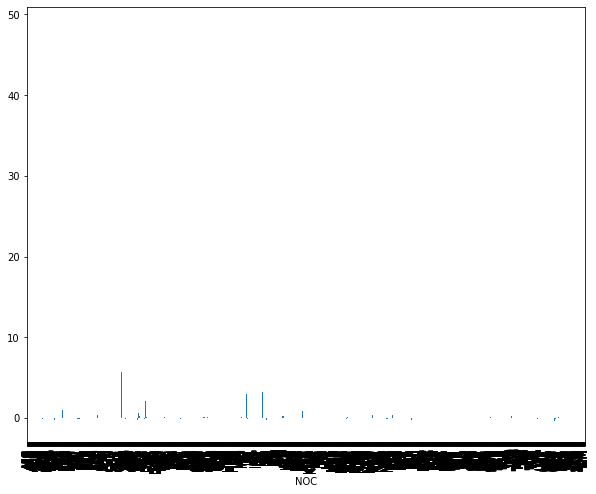

In [46]:
change = merged['Change']
plt.figure(figsize=(10,8))
change.plot(kind='bar')
plt.show()